In [110]:
 # Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [111]:
df = pd.read_csv('SaaS-Sales-cleaned.csv')  # Load our data set into data frame

In [112]:
df.head(10)   # Gives us a quick preview of the data


,ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/09/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/09/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,06/09/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,06/09/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,06/09/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,06/09/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,06/09/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


In [113]:
df.columns  #Shows all the columns

Index(['ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country',
       'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry',
       'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [114]:
#These are columns that is definitely important to the business but not needed for the analysis.
df.drop(columns=[ 'Date Key', 'Contact Name', 'License'], inplace=True)


In [115]:
# column names to lowercase, this avoids issues with 
# case sensitivity later on
df.columns = df.columns.str.lower()

df.columns

Index(['id', 'order id', 'order date', 'country', 'city', 'region',
       'subregion', 'customer', 'customer id', 'industry', 'segment',
       'product', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9994 non-null   int64  
 1   order id     9994 non-null   object 
 2   order date   9994 non-null   object 
 3   country      9994 non-null   object 
 4   city         9994 non-null   object 
 5   region       9994 non-null   object 
 6   subregion    9994 non-null   object 
 7   customer     9994 non-null   object 
 8   customer id  9994 non-null   int64  
 9   industry     9994 non-null   object 
 10  segment      9994 non-null   object 
 11  product      9994 non-null   object 
 12  sales        9994 non-null   float64
 13  quantity     9994 non-null   int64  
 14  discount     9994 non-null   float64
 15  profit       9994 non-null   float64
dtypes: float64(3), int64(3), object(10)
memory usage: 1.2+ MB


In [117]:
df = df.dropna()  # Remove duplicates and na values incase Excel had any which we missed
df = df.drop_duplicates()

In [118]:
df[['sales', 'profit']].agg(['min', 'max']) # ensures both are in the same format
                            
 # The row with the most sales and profit 
 # as well as the row with the least profit should be looked into more                            

,sales,profit
min,0.444,-6599.978
max,22638.480,8399.976


In [119]:
# Get the min and max values
stats = df[['sales', 'profit']].agg(['min', 'max'])

sales_max_idx = df['sales'].idxmax()
profit_min_idx = df['profit'].idxmin()
profit_max_idx = df['profit'].idxmax()


print("\nRow with Maximum Sales:")
print(df.loc[sales_max_idx])
print("\nRow with Minimum Profit:")
print(df.loc[profit_min_idx])
print("\nRow with Maximum Profit:")
print(df.loc[profit_max_idx])

 # The database service appears to generate lots 
 # of sales but also negative profit due to the discounts.


Row with Maximum Sales:
id                         2698
order id       EMEA-2020-145317
order date            3/18/2020
country                 Germany
city                     Berlin
region                     EMEA
subregion               EU-WEST
customer                 Anthem
customer id                1029
industry             Healthcare
segment              Enterprise
product         Big Ol Database
sales                  22638.48
quantity                      6
discount                    0.5
profit               -1811.0784
Name: 2697, dtype: object

Row with Minimum Profit:
id                         7773
order id       AMER-2022-108196
order date           11/26/2022
country                  Mexico
city                    Tijuana
region                     AMER
subregion                 LATAM
customer               Allstate
customer id                1003
industry                Finance
segment                     SMB
product         Big Ol Database
sales                  4499

In [120]:
df['order date'] = pd.to_datetime(df['order date']) # Convert 'Order Date' to datetime format for better analysis

In [121]:
sales_by_country = df.groupby('country')['sales'].sum().sort_values(ascending=False)   # Total sales by country
profit_by_product = df.groupby('product')['profit'].mean() 

print("Sales:", sales_by_country)   # USA and UK are the top two countries


Sales: country
United States           457687.6315
United Kingdom          313169.8810
Japan                   170188.0458
Canada                  138641.2700
France                  116511.9140
Germany                  89473.7080
Australia                80166.1010
Mexico                   78258.1360
Brazil                   76269.6140
Spain                    70636.7200
Sweden                   55603.1640
India                    53555.3600
Finland                  49095.8400
Argentina                35764.3120
Chile                    35282.0010
Ireland                  34298.1400
Italy                    32114.6100
Russia                   32108.1180
South Africa             30661.8730
Luxembourg               29863.1500
South Korea              28634.4340
Philippines              27451.0690
China                    23705.5230
Norway                   22627.9560
Poland                   22205.1500
Singapore                19683.3900
Portugal                 19510.6400
Belgium      

In [122]:
print("Profit", profit_by_product) 

Profit product
Alchemy                       817.909190
Big Ol Database                29.432669
ChatBot Plugin                  8.200737
ContactMatcher                  6.784084
Data Smasher                   54.111788
FinanceHub                     32.758838
Marketing Suite               -15.230509
Marketing Suite - Gold         25.152277
OneView                        38.922758
SaaS Connector Pack            13.645918
SaaS Connector Pack - Gold     27.418019
Site Analytics                 50.073938
Storage                         4.375660
Support                        21.066968
Name: profit, dtype: float64


In [123]:
correlation = df[['sales', 'profit', 'discount', 'quantity']].corr()   # Calculate correlation matrix
print("Correlation Matrix:\n", correlation)

 # Check correlation between different attributes

Correlation Matrix:
              sales    profit  discount  quantity
sales     1.000000  0.479064 -0.028190  0.200795
profit    0.479064  1.000000 -0.219487  0.066253
discount -0.028190 -0.219487  1.000000  0.008623
quantity  0.200795  0.066253  0.008623  1.000000


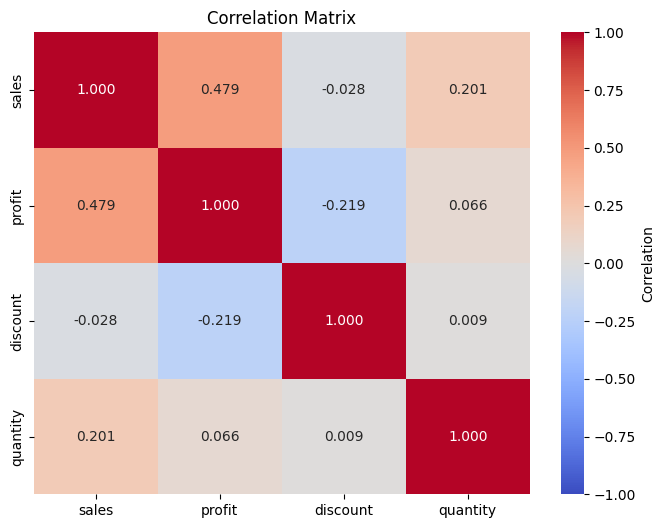

In [124]:
plt.figure(figsize=(8, 6))
sb.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png')
plt.show() # Profit and sales are highly correlated, while discount has a negative correlation with profit

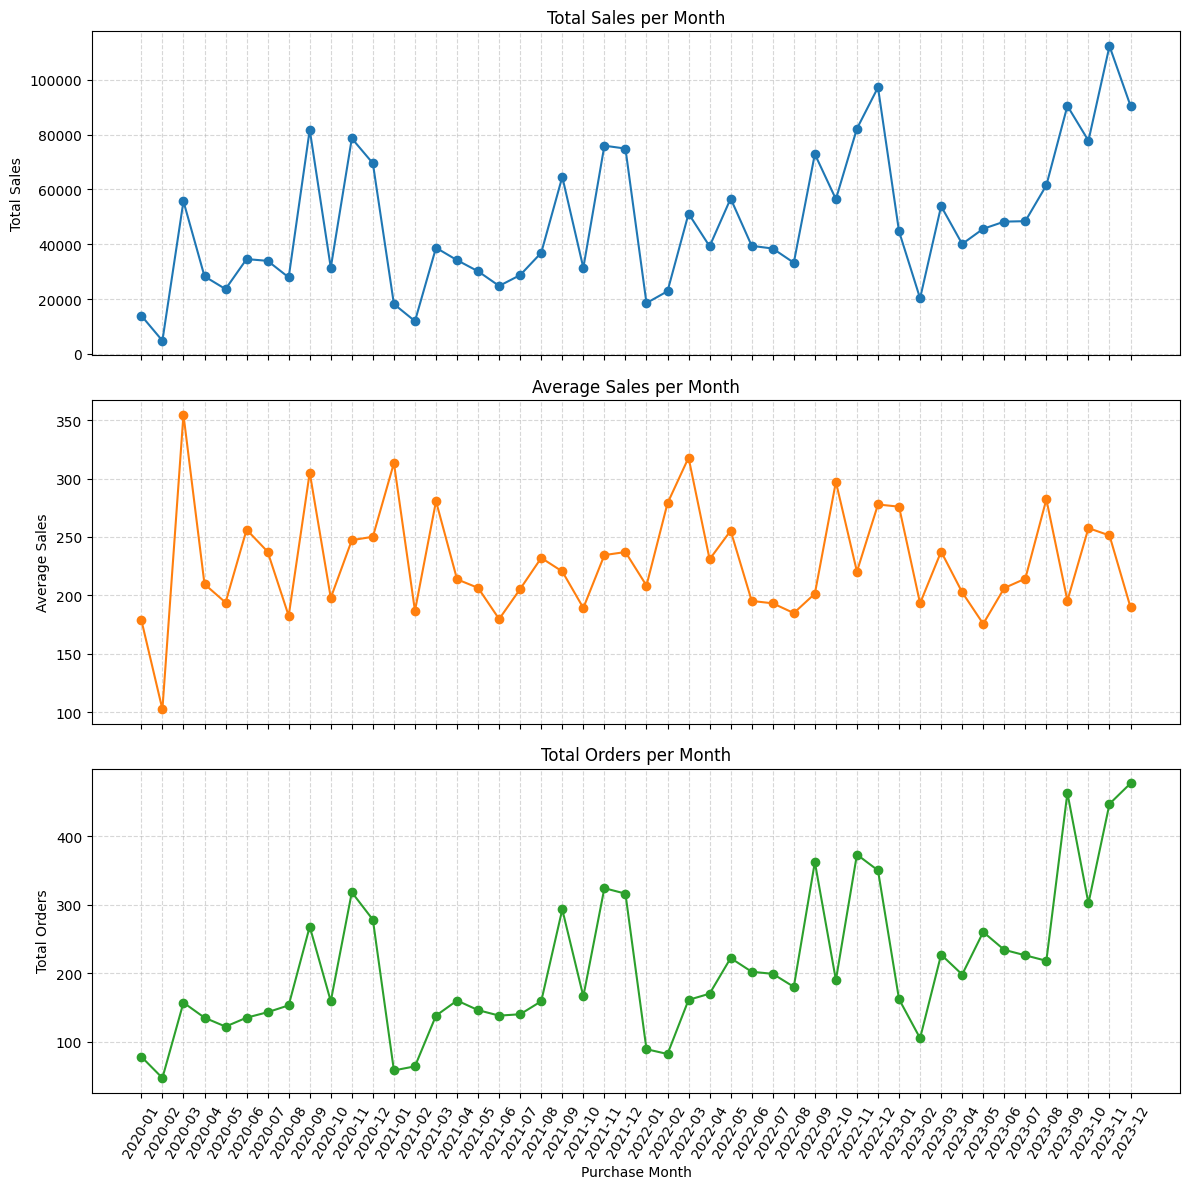

In [125]:
# Extract month from the date and calculate monthly summary
df['purchase_month'] = pd.to_datetime(df['order date']).dt.to_period('M')  # Convert to monthly periods
monthly_summary = df.groupby('purchase_month')['sales'].sum().reset_index(name='total_sales')

# Calculate average sales and total orders (assuming these need to be derived)
monthly_summary['avg_sales'] = df.groupby('purchase_month')['sales'].mean().reset_index(name='avg_sales')['avg_sales']
monthly_summary['total_orders'] = df.groupby('purchase_month')['order id'].count().reset_index(name='total_orders')['total_orders']

# Ensure the index is reset and column names are clear
monthly_summary_reset = monthly_summary.copy()

# Convert purchase_month to string for plotting (or to timestamps if preferred)
monthly_summary_reset['purchase_month'] = monthly_summary_reset['purchase_month'].astype(str)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Total Sales
axes[0].plot(monthly_summary_reset['purchase_month'], monthly_summary_reset['total_sales'], marker='o', color='tab:blue')
axes[0].set_title('Total Sales per Month')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Average Sales
axes[1].plot(monthly_summary_reset['purchase_month'], monthly_summary_reset['avg_sales'], marker='o', color='tab:orange')
axes[1].set_title('Average Sales per Month')
axes[1].set_ylabel('Average Sales')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Total Orders
axes[2].plot(monthly_summary_reset['purchase_month'], monthly_summary_reset['total_orders'], marker='o', color='tab:green')
axes[2].set_title('Total Orders per Month')
axes[2].set_xlabel('Purchase Month')
axes[2].set_ylabel('Total Orders')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=60)

# Adjust spacing
plt.tight_layout()
plt.show()


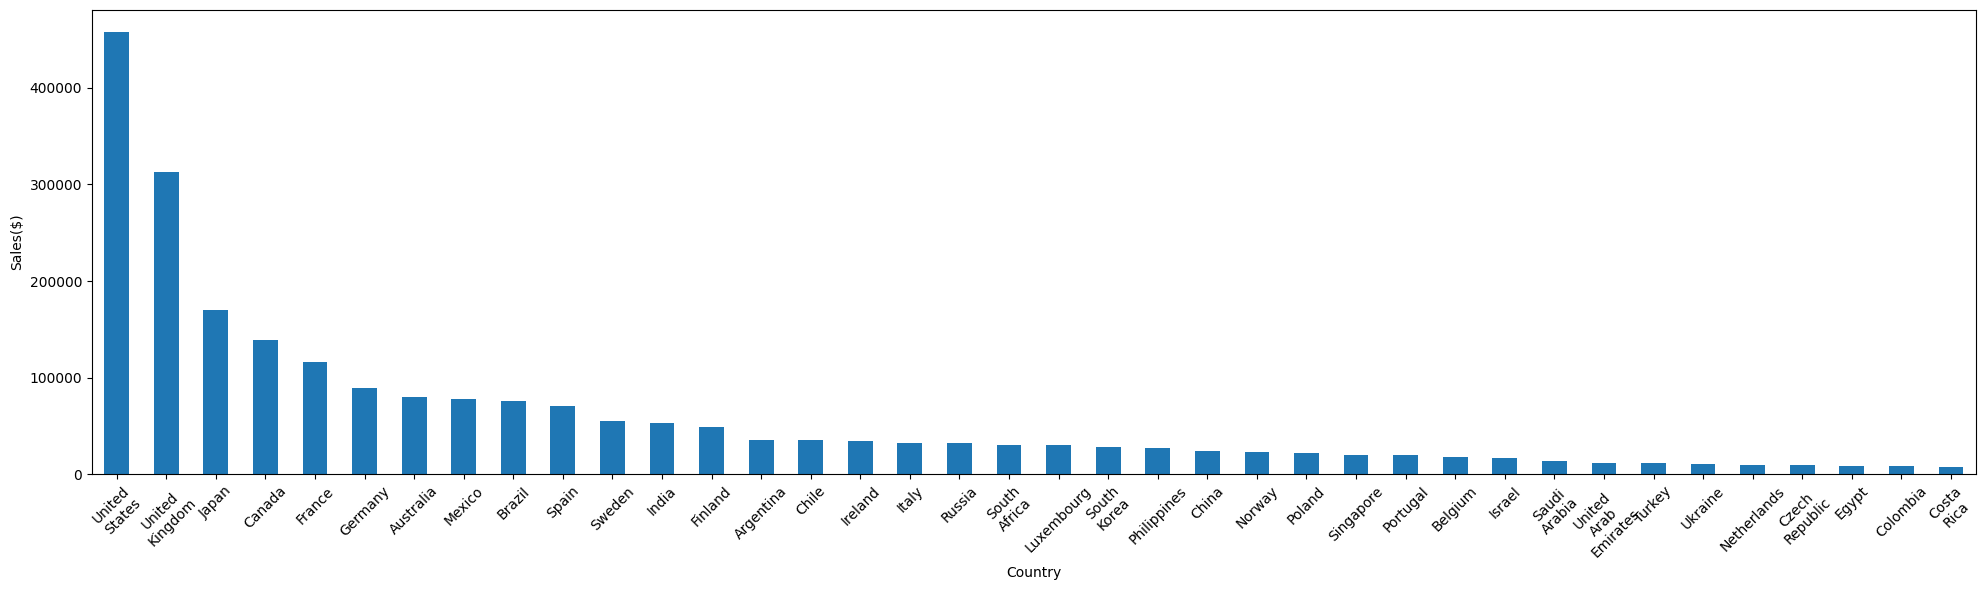

In [126]:
# Sort the data by sales and select all but the bottom 10 countries
top_countries = sales_by_country.sort_values(ascending=False).iloc[:-10]

plt.figure(figsize=(20, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sales($)')
plt.xticks(rotation=45, fontsize=10)

# Split multi-word country names into multiple lines
labels = [name.replace(' ', '\n') if ' ' in name else name for name in top_countries.index]
plt.xticks(range(len(top_countries)), labels, rotation=45)

plt.tight_layout()
plt.savefig('country_sales.png')
plt.show()

 # As mentioned previously usa and uk dominate the sales

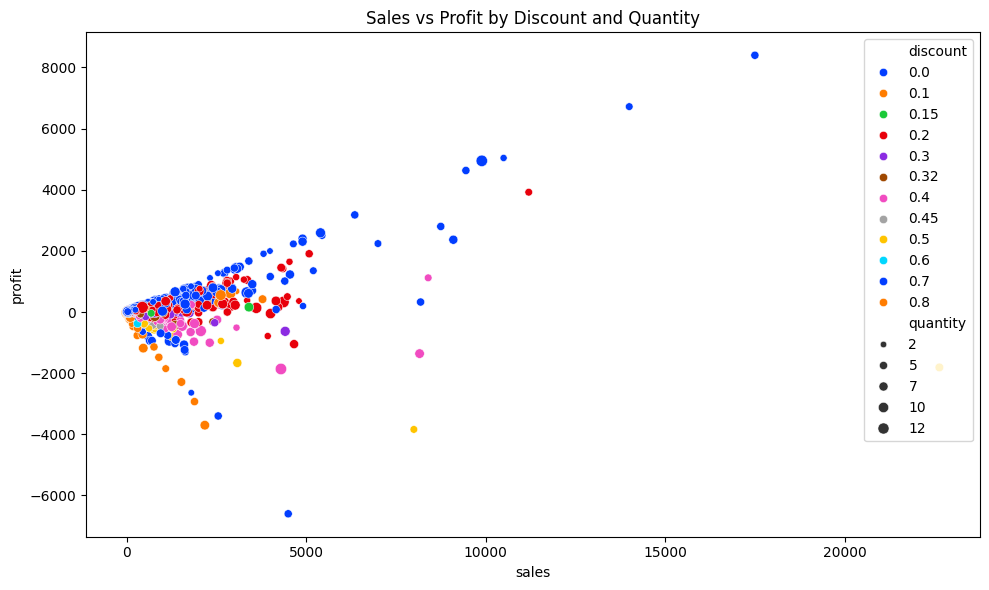

In [127]:

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='sales', y='profit', hue='discount', size='quantity', palette='bright')
plt.title('Sales vs Profit by Discount and Quantity')
plt.tight_layout()
plt.savefig('sales_vs_profit.png')
plt.show()

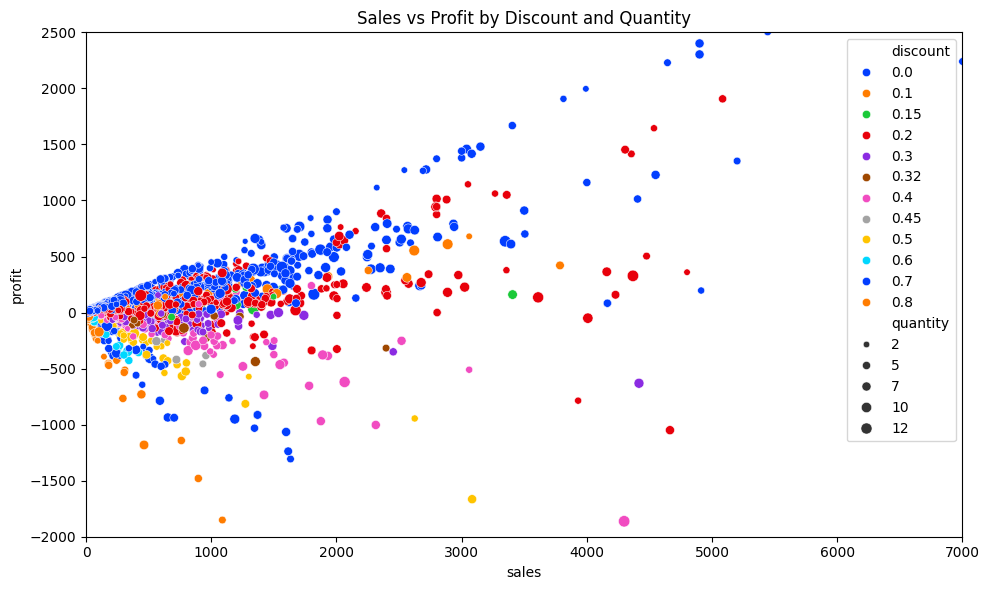

In [128]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='sales', y='profit', hue='discount', size='quantity', palette='bright')
plt.title('Sales vs Profit by Discount and Quantity')
plt.xlim(0, 7000)  # Adjust these values to zoom into the desired x-range
plt.ylim(-2000, 2500)    # Adjust these values to zoom into the desired y-range
plt.tight_layout()
plt.savefig('sales_vs_profit.png')
plt.show()

In [129]:
# Additional analysis -  creating new variables

# 1. Profit margin analysis
df['profit_margin'] = (df['profit'] / df['sales']) * 100
profit_margin_by_country = df.groupby('country')['profit_margin'].mean().sort_values(ascending=False)

print("Average Profit Margin by Country (%):")
print(profit_margin_by_country)





Average Profit Margin by Country (%):
country
Austria                 42.200000
United Arab Emirates    37.950000
Croatia                 37.750000
Netherlands             37.050000
Denmark                 36.375000
Luxembourg              35.797753
Qatar                   35.142857
Philippines             35.007440
India                   34.785235
Poland                  34.606061
Ukraine                 34.566038
Finland                 34.521739
Egypt                   34.454545
China                   34.375510
Greece                  34.259259
Iceland                 33.892857
Saudi Arabia            33.642857
Argentina               33.528571
Czech Republic          33.523810
Indonesia               33.375000
Brazil                  33.338998
South Korea             33.275132
Spain                   33.200893
Portugal                33.147541
Singapore               33.106061
Ireland                 32.904762
Costa Rica              32.842105
Italy                   31.790909
Co

In [130]:
# 2. Revenue per unit analysis
df['rev_per_unit'] = df['sales'] / df['quantity']
revenue_per_unit_by_product = df.groupby('product')['rev_per_unit'].mean().sort_values(ascending=False)

print("Average Revenue per Unit by Product:")
print(revenue_per_unit_by_product)



Average Revenue per Unit by Product:
product
Alchemy                       601.021029
Big Ol Database               423.352470
Marketing Suite               131.100152
Site Analytics                101.127993
FinanceHub                     90.387114
Marketing Suite - Gold         70.451459
OneView                        60.618659
ContactMatcher                 58.911590
Data Smasher                   55.356630
SaaS Connector Pack            25.607413
Support                        22.122892
SaaS Connector Pack - Gold     18.874843
ChatBot Plugin                  8.818075
Storage                         3.288756
Name: rev_per_unit, dtype: float64


In [131]:
#  each discount will be placed in a
#  range where analysis will be performed on it
bins = [0, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['No Discount (0-0)', 'Very Low Discount (0.001-0.1)', 'Low Discount (0.1-0.2)', 
          'Moderately Low Discount (0.2-0.3)', 'Moderate Discount (0.3-0.4)', 
          'Moderately High Discount (0.4-0.5)', 'High Discount (0.5-0.6)', 
          'Very High Discount (0.6-0.7)', 'Extremely High Discount (0.7-0.8)', 
          'Near Total Discount (0.8-0.9)', 'Full Discount (0.9-1.0)']

# Create discount_category column
df['discount_category'] = pd.cut(df['discount'], bins=bins, labels=labels, include_lowest=True)

# Group by the new discount category and calculate means
discount_impact = df.groupby('discount_category').agg({
    'sales': 'mean',
    'profit': 'mean',
    'profit_margin': 'mean'
}).round(2)

print("Impact of Discount Categories:")
print(discount_impact)

 # this shows the effect of discounts on sales and profit

Impact of Discount Categories:
                                     sales  profit  profit_margin
discount_category                                                
No Discount (0-0)                   226.74   66.90          34.02
Very Low Discount (0.001-0.1)       578.40   96.06          15.58
Low Discount (0.1-0.2)              213.58   24.74          17.48
Moderately Low Discount (0.2-0.3)   454.74  -45.68         -11.55
Moderate Discount (0.3-0.4)         561.85 -109.22         -21.69
Moderately High Discount (0.4-0.5)  836.41 -298.70         -53.56
High Discount (0.5-0.6)              48.15  -43.08         -68.91
Very High Discount (0.6-0.7)         97.18  -95.87         -79.47
Extremely High Discount (0.7-0.8)    56.55 -101.80        -182.50
Near Total Discount (0.8-0.9)          NaN     NaN            NaN
Full Discount (0.9-1.0)                NaN     NaN            NaN


C:\Users\kille\AppData\Local\Temp\ipykernel_14996\1532306786.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('discount_category').agg({


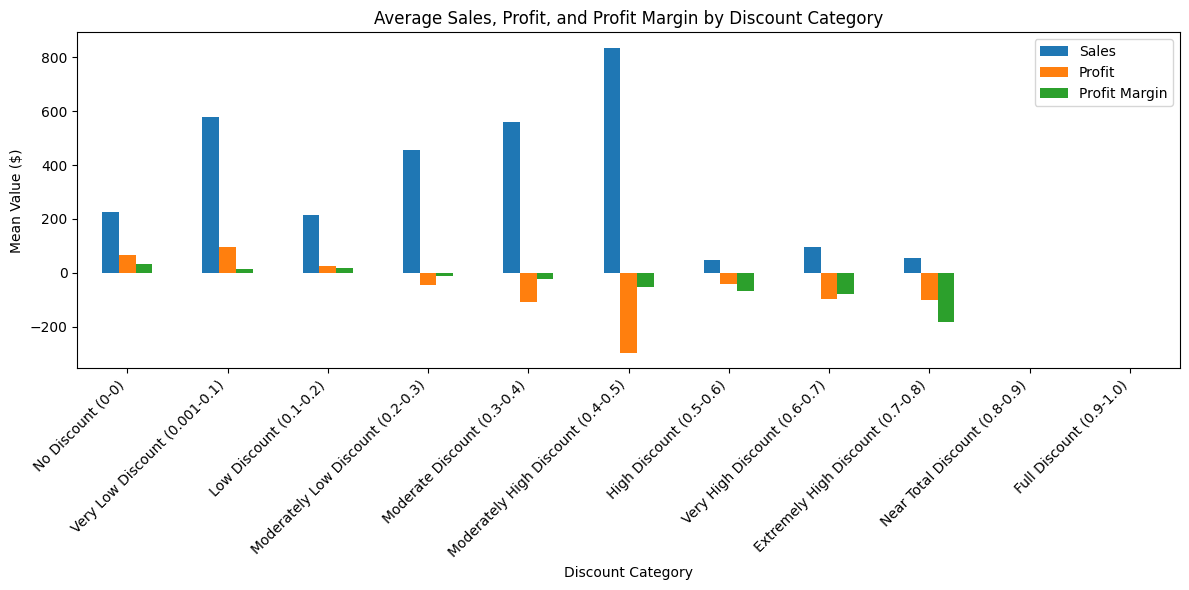

In [132]:
# Plotting the bar chart
discount_impact.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sales, Profit, and Profit Margin by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Mean Value ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Sales', 'Profit', 'Profit Margin'])
plt.tight_layout()
plt.savefig('discount_impact_bar.png')
plt.show()

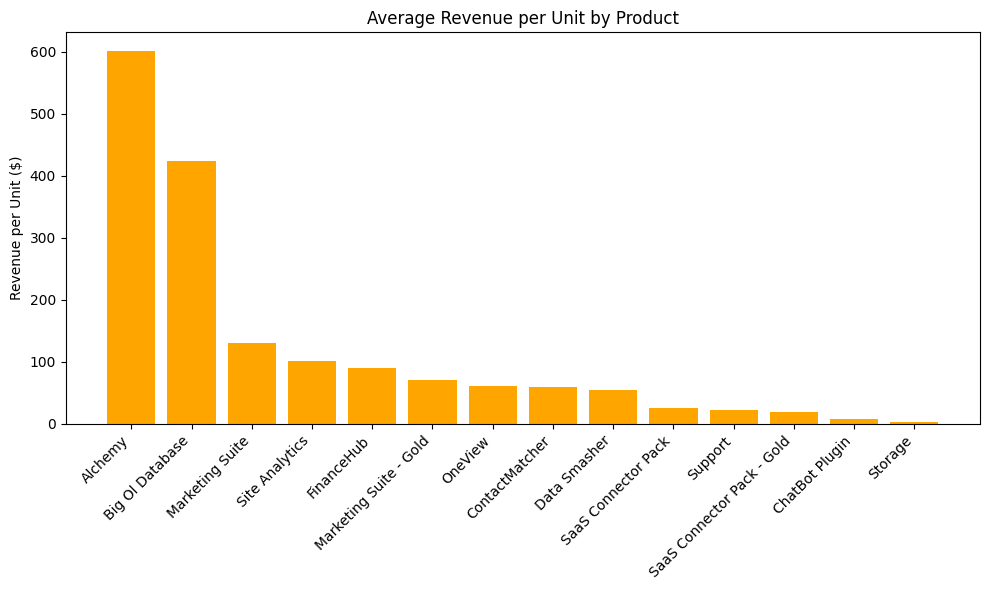

Additional analysis visualizations saved as additional_analysis.png


In [133]:
# Revenue per unit by product
plt.figure(figsize=(10, 6))
plt.bar(revenue_per_unit_by_product.index, revenue_per_unit_by_product.values, color='orange')
plt.title('Average Revenue per Unit by Product')
plt.ylabel('Revenue per Unit ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('additional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Additional analysis visualizations saved as additional_analysis.png")

In [134]:

# Round only the selected columns to 2 decimal places 
# otherwise it will cause problems with the formatting on excel
df["profit_margin"] = df["profit_margin"].round(2)
df["rev_per_unit"] = df["rev_per_unit"].round(2)

# Save to CSV with formatted floats
df.to_csv("SaaS_Cleaned1.csv", index=False, float_format="%.2f")



